# CÁC MÔ HÌNH PHÂN LỚP VÀ PHƯƠNG PHÁP ĐÁNH GIÁ

Chào mừng bạn đến với Jupyter Notebook này! Trong hướng dẫn này, chúng ta sẽ khám phá nhiều mô hình phân loại khác nhau và đánh giá hiệu suất của từng mô hình bằng cách sử dụng bộ dữ liệu về ung thư vú từ thư viện `scikit-learn`. Mục tiêu của chúng ta là tìm hiểu cách sử dụng các chỉ số như độ chính xác (accuracy), độ chính xác của dự đoán dương (precision), độ chính xác của dự đoán âm (recall), điểm F1 (F1 score), và ma trận nhầm lẫn (confusion matrix) để đánh giá độ chính xác và hiệu suất của các mô hình phân loại.

Hãy cùng bắt đầu hành trình khám phá các mô hình và đánh giá chúng!

### 1. Tải dữ liệu

Đầu tiên, ta sẽ import những thư viện cần thiết và bộ dữ liệu vào dataframe `df`.

In [1]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Tải dữ liệu
iris = load_breast_cancer()
X = iris.data
y = iris.target

# Tạo dataframe để dễ dàng quan sát dữ liệu
df = pd.DataFrame(data=X, columns=iris.feature_names)
df["target"] = y

In [2]:
# Xem qua một vài dòng dữ liệu
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 2. Tiền xử lý dữ liệu
Thông thường, các bộ dữ liệu sẽ được chia thành các tập `train`, `test` để huấn luyện và đánh giá một cách công bằng. Ta sẽ sử dụng hàm `train_test_split` để thực hiện công việc này.

In [3]:
# Chia bộ dữ liệu thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa các đặc trưng
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 3. Xây dựng lớp bao bọc (wrapper class)

Lớp bao bọc cho mô hình phân loại (Classification Model Wrapper) là một lớp được tạo ra để bao quanh mô hình phân loại, cung cấp một giao diện thống nhất cho việc sử dụng, đào tạo, dự đoán và đánh giá các mô hình phân loại khác nhau.

**Bài tập**: Hãy xây dựng một lớp bao bọc (wrapper) nhận một mô hình phân lớp từ thư viện `sklearn` làm tham số cho constructor của đối tượng và thực hiện những chức năng đã được định nghĩa như bên dưới:

In [4]:
class ClassificationModelWrapper:
    """
    Một lớp bao bọc cho các mô hình phân loại, cung cấp một giao diện nhất quán.
    """

    def __init__(self, model):
        """
        Khởi tạo ClassificationModelWrapper với mô hình phân loại được chỉ định.

        Tham số:
        model : object
            Mô hình phân loại cần được bao bọc.
        """
        self.model = model

    def fit(self, X, y):
        """
        Huấn luyện mô hình phân loại đã bao bọc trên dữ liệu huấn luyện.

        Tham số:
        X : array-like hoặc pd.DataFrame, hình dạng (n_samples, n_features)
            Các mẫu đầu vào cho việc huấn luyện.
        y : array-like, hình dạng (n_samples,)
            Giá trị mục tiêu.
        """
        # YOUR CODE HERE

        ### BEGIN SOLUTION
        self.model.fit(X, y)
        ### END SOLUTION
        pass

    def predict(self, X):
        """
        Dự đoán các nhãn lớp cho các mẫu đầu vào.

        Tham số:
        X : array-like hoặc pd.DataFrame, hình dạng (n_samples, n_features)
            Các mẫu đầu vào cần dự đoán.

        Trả về:
        y_pred : array, hình dạng (n_samples,)
            Các nhãn lớp được dự đoán.
        """
        # YOUR CODE HERE

        ### BEGIN SOLUTION
        return self.model.predict(X)
        ### END SOLUTION
        pass


    def evaluate(self, X, y):
        """
        Đánh giá mô hình phân loại đã bao bọc trên dữ liệu đã cho và tính toán các chỉ số đánh giá.

        Tham số:
        X : array-like hoặc pd.DataFrame, hình dạng (n_samples, n_features)
            Các mẫu đầu vào cần đánh giá.
        y : array-like, hình dạng (n_samples,)
            Giá trị mục tiêu thực.

        Trả về:
        evaluation_metrics : dict
            Một từ điển chứa các chỉ số đánh giá bao gồm Độ chính xác (Accuracy), Độ chính xác (Precision),
            Độ phủ (Recall), F1 Score và Ma trận nhầm lẫn (Confusion Matrix).
        """
        # YOUR CODE HERE

        ### BEGIN SOLUTION
        y_pred = self.predict(X)
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred)
        recall = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        confusion = confusion_matrix(y, y_pred)
        ### END SOLUTION

        return {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': confusion
        }

### 4. Thử nghiệm trên nhiều mô hình phân loại khác nhau

**Bài tập**: hãy lần lượt khởi tạo các mô hình logistic regression, knn, decision tree, svm sử dụng các class từ thư viện `sklearn` đã được import bên trên với tham số ***random_state=42*** đối với những mô hình nhận tham số ***random_state***.

In [5]:
logistic_reg = None
knn_classifier = None
decision_tree = None
svm_classifier = None

### BEGIN SOLUTION
logistic_reg = LogisticRegression(random_state=42)
knn_classifier = KNeighborsClassifier() 
decision_tree = DecisionTreeClassifier(random_state=42)
svm_classifier = SVC(random_state=42)
### END SOLUTION

In [6]:
# Khởi tạo các lớp bao bọc ứng với các lớp mô hình bên trên
model1 = ClassificationModelWrapper(logistic_reg)
model2 = ClassificationModelWrapper(knn_classifier)
model3 = ClassificationModelWrapper(decision_tree)
model4 = ClassificationModelWrapper(svm_classifier)

assert model1.model.__class__ == LogisticRegression
assert model2.model.__class__ == KNeighborsClassifier
assert model3.model.__class__ == DecisionTreeClassifier
assert model4.model.__class__ == SVC

Sau khi đã khởi tạo các mô hình phân loại, ta sẽ tiến hành huấn luyện các model trên tập train bằng phương thức `fit` với từng mô hình tương ứng.

In [7]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

Bước tiếp theo, chúng ta sẽ đánh giá hiệu suất của các mô hình trên tập dữ liệu kiểm tra (tập test) bằng cách sử dụng phương thức `evaluate`. Điều này giúp chúng ta xem xét và so sánh cách mà từng mô hình hoạt động trên dữ liệu mới, giúp đánh giá khả năng tổng quan của mô hình trong việc dự đoán.

In [8]:
model1_evaluation = model1.evaluate(X_test, y_test)
model2_evaluation = model2.evaluate(X_test, y_test)
model3_evaluation = model3.evaluate(X_test, y_test)
model4_evaluation = model4.evaluate(X_test, y_test)

In [9]:
assert len(model1_evaluation.keys()) == 5
assert "Accuracy" in model1_evaluation
assert "Precision" in model1_evaluation
assert "Recall" in model1_evaluation
assert "F1 Score" in model1_evaluation
assert "Confusion Matrix" in model1_evaluation

### 5. Visualize kết quả của từng mô hình trên tập test

Để so sánh hiệu suất của từng mô hình, chúng ta sẽ trực quan hóa các chỉ số đánh giá, bao gồm accuracy, precision, recall và F1-score. Thông qua việc trực quan hóa, chúng ta có thể thấy rõ sự khác biệt giữa các mô hình và xác định mô hình nào hoạt động tốt hơn.

Chúng ta sẽ sử dụng biểu đồ hoặc đồ thị để hiển thị các chỉ số này, giúp chúng ta dễ dàng so sánh và đưa ra quyết định về mô hình nào nên sử dụng trong tình huống cụ thể.

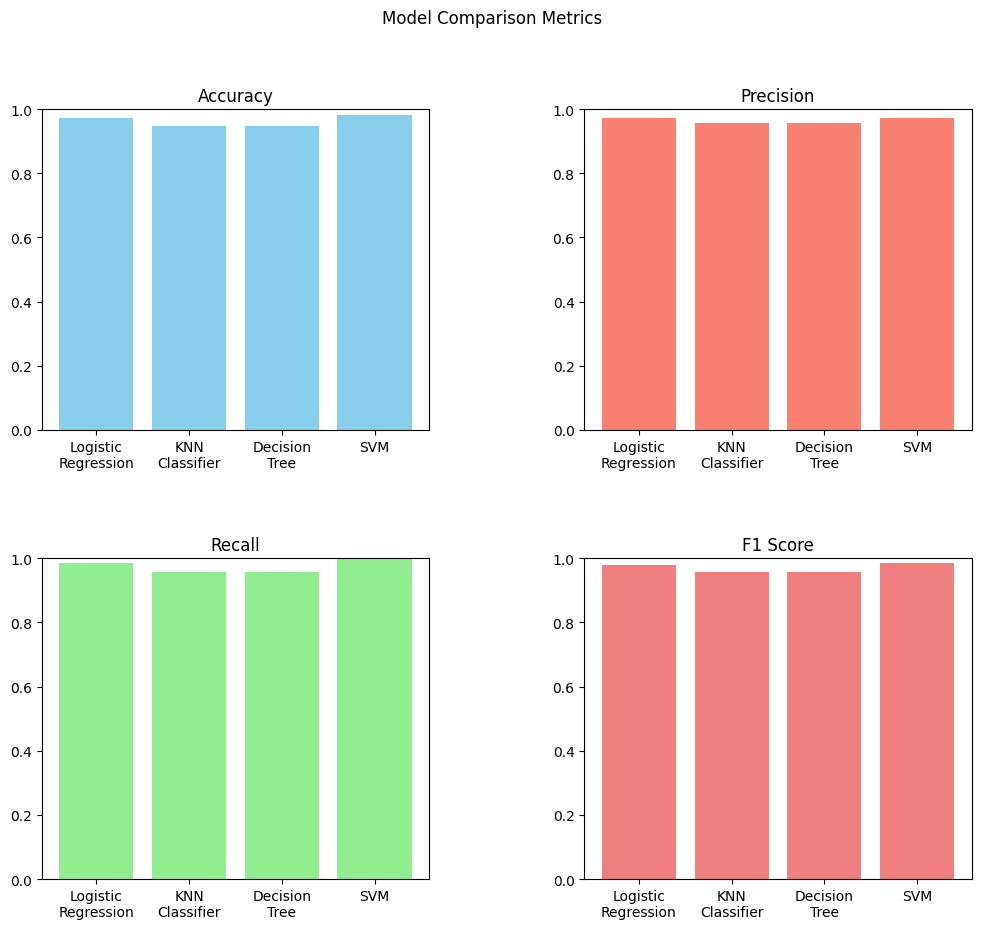

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

models = ['Logistic\nRegression', 'KNN\nClassifier', 'Decision\nTree', 'SVM']
accuracies = [model1_evaluation['Accuracy'], model2_evaluation['Accuracy'], model3_evaluation['Accuracy'], model4_evaluation['Accuracy']]
precisions = [model1_evaluation['Precision'], model2_evaluation['Precision'], model3_evaluation['Precision'], model4_evaluation['Precision']]
recalls = [model1_evaluation['Recall'], model2_evaluation['Recall'], model3_evaluation['Recall'], model4_evaluation['Recall']]
f1_scores = [model1_evaluation['F1 Score'], model2_evaluation['F1 Score'], model3_evaluation['F1 Score'], model4_evaluation['F1 Score']]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Model Comparison Metrics')

axs[0, 0].bar(models, accuracies, color='skyblue')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylim(0, 1)

axs[0, 1].bar(models, precisions, color='salmon')
axs[0, 1].set_title('Precision')
axs[0, 1].set_ylim(0, 1)

axs[1, 0].bar(models, recalls, color='lightgreen')
axs[1, 0].set_title('Recall')
axs[1, 0].set_ylim(0, 1)

axs[1, 1].bar(models, f1_scores, color='lightcoral')
axs[1, 1].set_title('F1 Score')
axs[1, 1].set_ylim(0, 1)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

Để đánh giá hiệu suất của mô hình, chúng ta sẽ trực quan hóa ma trận nhầm lẫn (confusion matrix) của từng mô hình. Ma trận nhầm lẫn là một công cụ quan trọng để đánh giá khả năng phân loại của mô hình, bằng cách cho biết số lượng các điểm dữ liệu thực sự thuộc vào từng lớp và số lượng điểm dữ liệu được dự đoán đúng hoặc sai.

Chúng ta sẽ sử dụng biểu đồ hoặc đồ thị để hiển thị ma trận nhầm lẫn, giúp chúng ta hiểu rõ hơn về khả năng phân loại của từng mô hình. Ma trận nhầm lẫn bao gồm bốn giá trị chính: True Positives (TP), True Negatives (TN), False Positives (FP), và False Negatives (FN). Bằng cách trực quan hóa ma trận nhầm lẫn, chúng ta có thể thấy được sự phân bố của các dự đoán đúng và sai trên các lớp khác nhau, từ đó đánh giá được hiệu suất của mô hình.

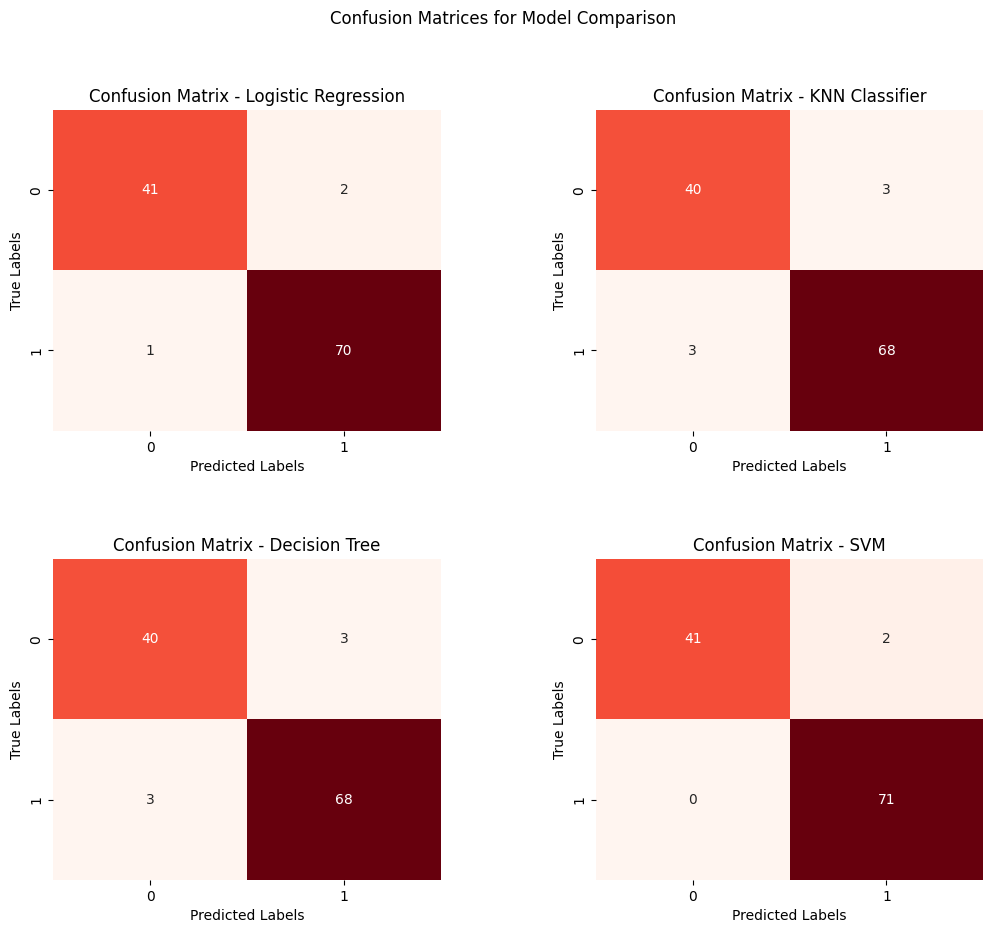

In [16]:
def plot_confusion_matrix(confusion_matrix, model_name, ax):
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="Reds", cbar=False, ax=ax)
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Confusion Matrices for Model Comparison')

plot_confusion_matrix(model1_evaluation['Confusion Matrix'], 'Logistic Regression', axs[0, 0])
plot_confusion_matrix(model2_evaluation['Confusion Matrix'], 'KNN Classifier', axs[0, 1])
plot_confusion_matrix(model3_evaluation['Confusion Matrix'], 'Decision Tree', axs[1, 0])
plot_confusion_matrix(model4_evaluation['Confusion Matrix'], 'SVM', axs[1, 1])

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()